# Google play scraping 

In [1]:
#import dependencies
import pandas as pd
from google_play_scraper import Sort, reviews
from google_play_scraper import reviews_all
import csv
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import schedule
import time
import os

In [106]:
#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud


# Banks to scrape (replace with actual app IDs)
  - CBE
  - DASHEN Bank 
  - BOA 

In [146]:
# google play store bank app scraping 
banks = [
    'com.combanketh.mobilebanking',  # Commercial Bank of Ethiopia
    'com.dashen.dashensuperapp',    # Dashen Bank
    'com.boa.boaMobileBanking'      # Bank of Abyssinia
]
all_reviews = []

**1. Collecting individual bank Reviews**

In [ ]:
# Function to fetch reviews for each bank app
def fetch_reviews():
   for bank in banks:
     try:
        reviews = reviews_all(
            app_id=bank,
            sleep_milliseconds=0,
            lang='en',
            country='us'
        )
        all_reviews.extend(reviews[:400])
     except Exception as e:
        print(f"Error fetching {bank}: {e}")
        #print lenghth of all_reviews
        print(f"Total reviews fetched so far: {len(all_reviews)}")
        return all_reviews

**2. Normalize Date**

In [176]:
# normalize the data
df=pd.DataFrame(all_reviews)
# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'], unit='ms')

#rename columns
df.rename(columns={
    'content': 'review_text',
    'score': 'rating',
    'at': 'review_date',
    'reviewId': 'review_id',
    'userName': 'userName'  
}, inplace=True)
df.head(10)

,review_id,userName,userImage,review_text,rating,thumbsUpCount,reviewCreatedVersion,review_date,replyContent,repliedAt,appVersion
0,a7d1c799-ba53-4a0a-a8d6-c5400a009825,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,A great app. It's like carrying a bank in your...,4,0,5.1.0,2025-06-07 20:21:52,None,None,5.1.0
1,64ed5562-1758-4eb8-9291-8b6edc394118,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,More than garrantty bank EBC.,4,0,None,2025-06-07 18:21:26,None,None,None
2,d0c05687-ddd4-43fb-95a9-08f6358d80a2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,really am happy to this app it is Siple to use...,5,0,5.1.0,2025-06-07 11:02:38,None,None,5.1.0
3,811bf820-3529-433a-9b6d-e624fa23a16a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I liked this app. But the User interface is ve...,2,0,5.1.0,2025-06-07 10:50:29,None,None,5.1.0
4,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"""Why don’t your ATMs support account-to-accoun...",4,0,None,2025-06-06 09:54:11,None,None,None
5,8efd71e9-59cd-41ce-8c5c-12052dee9ad0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,what is this app problem???,1,0,5.1.0,2025-06-05 22:16:56,None,None,5.1.0
6,b12d0383-9b27-4e49-a94d-277a43b15800,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,the app is proactive and a good connections.,5,0,5.1.0,2025-06-05 15:55:10,None,None,5.1.0
7,dd9f9e37-177a-46df-b877-d0edaa9aed29,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I cannot send to cbebirr app. through this app.,3,0,None,2025-06-05 11:12:49,None,None,None
8,8e34703c-203c-4180-8b32-bfd0b3f0c871,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,4,0,None,2025-06-05 10:21:59,None,None,None
9,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,not functional,1,0,5.1.0,2025-06-05 07:38:12,None,None,5.1.0


**3.Save the scraping to CSV file**

In [ ]:
#save the scraped to existing Data folder
df.to_csv('F:/Bank-Reviews-Analysis/Data/google_play_bank _reviews.csv', index=False, encoding='utf-8-sig')
print("Data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews.csv' successfully.")

Data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews.csv' successfully.


**4. Length  of scraped Reviews**

In [173]:
# length of the DataFrame
print(f"Total reviews collected: {len(df)}")

Total reviews collected: 1200


 # Data Cleaning 

In [181]:

#handle duplicate reviews
df.drop_duplicates(subset=['review_id','review_text','rating'], inplace=True)
#print the duplicate reviews
#check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
#drop missing values
Missing_value=df.dropna()
#print the missing values
print(f"Total missing values removed: {len(Missing_value)}")


Missing values in each column:
review_id                  0
userName                   0
userImage                  0
review_text                0
rating                     0
thumbsUpCount              0
reviewCreatedVersion     282
review_date                0
replyContent            1200
repliedAt               1200
appVersion               282
dtype: int64
Total missing values removed: 0


In [182]:
#save the cleaned data to csv file
df.to_csv('F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv', index=False, encoding='utf-8-sig')
print("Cleaned data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv' successfully.")

Cleaned data saved to 'F:/Bank-Reviews-Analysis/Data/google_play_bank_reviews_cleaned.csv' successfully.


**visualization cleaned data for CBE**

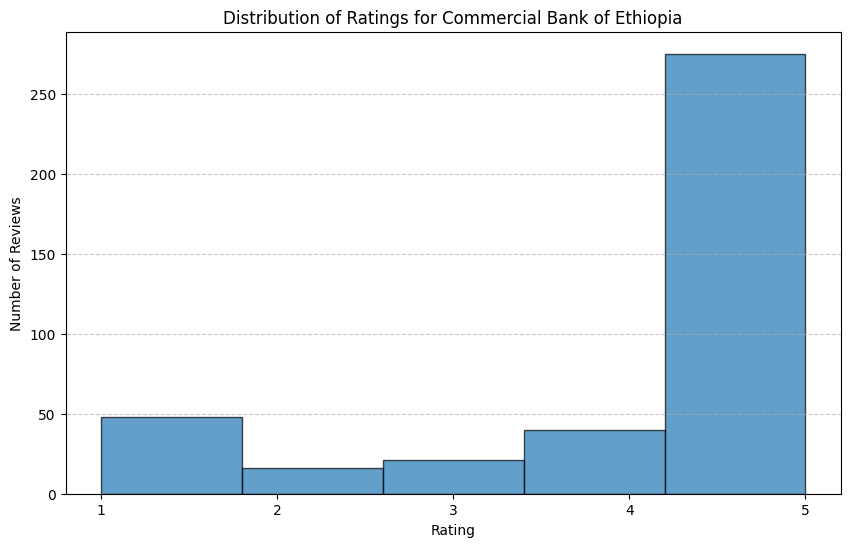

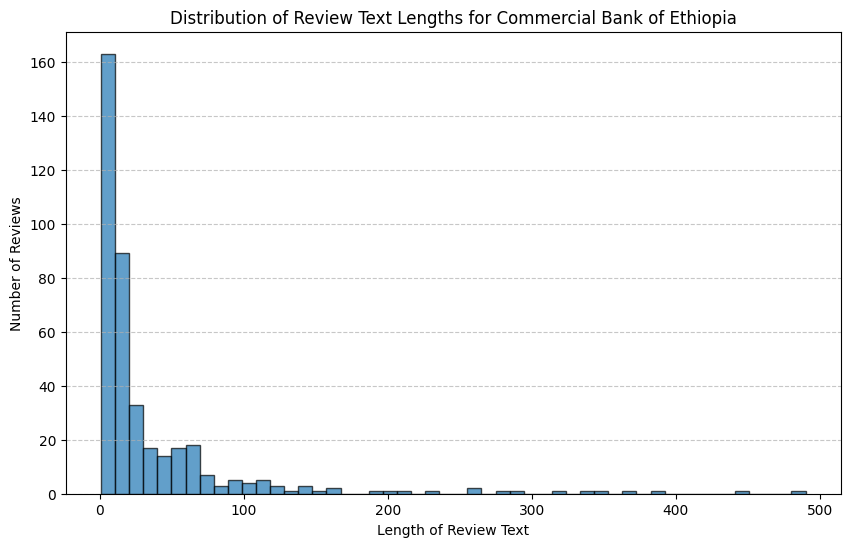

In [183]:
#Extract the first 400 raw from df_reviews
CBE_bank = df.iloc[:400]
#save the CBE bank reviews to csv file
CBE_bank.to_csv('F:/Bank-Reviews-Analysis/Data/CBE_bank_reviews.csv', index=False, encoding='utf-8-sig')
CBE_bank.head(10)

#visualization CBE bank reviews
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Commercial Bank of Ethiopia')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Commercial Bank of Ethiopia')    
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



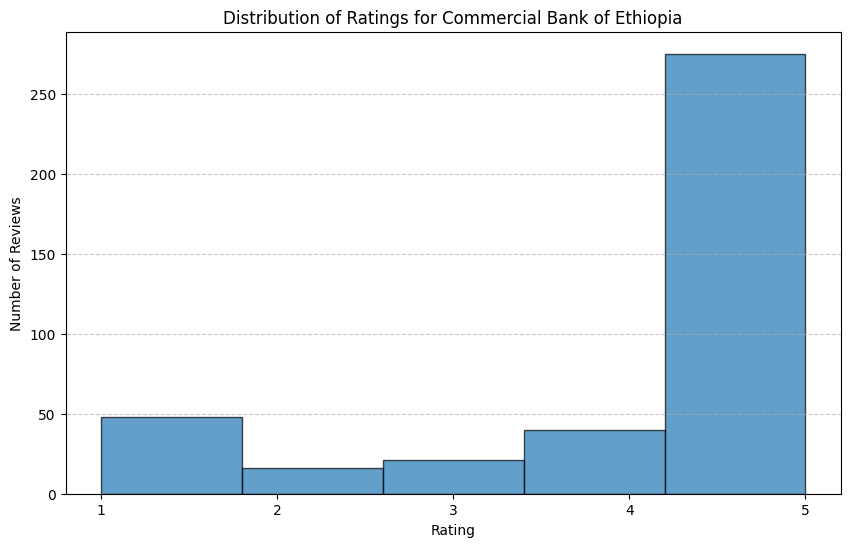

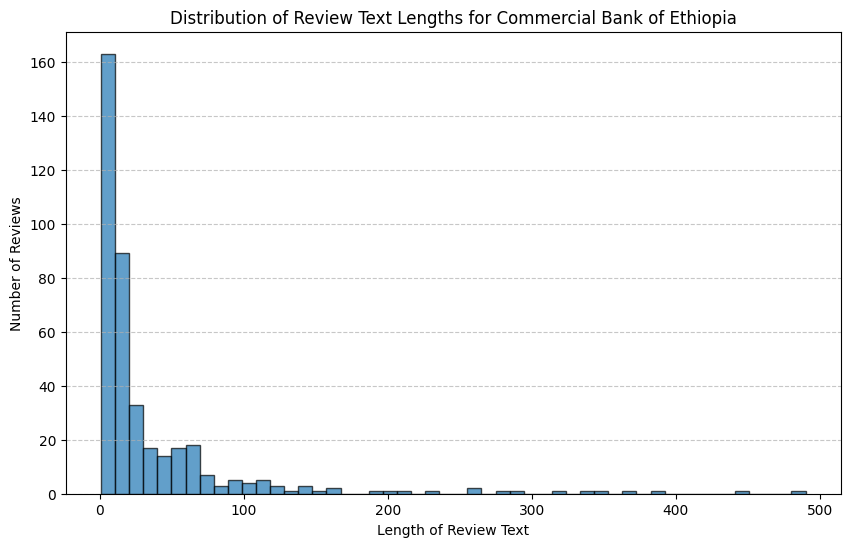

In [184]:

#visualization CBE bank reviews
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Commercial Bank of Ethiopia')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
plt.figure(figsize=(10, 6))
plt.hist(CBE_bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Commercial Bank of Ethiopia')    
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



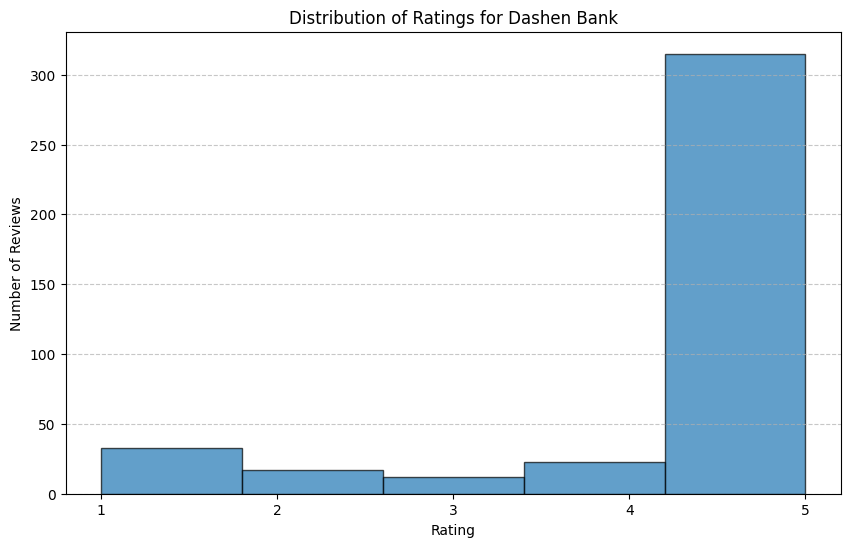

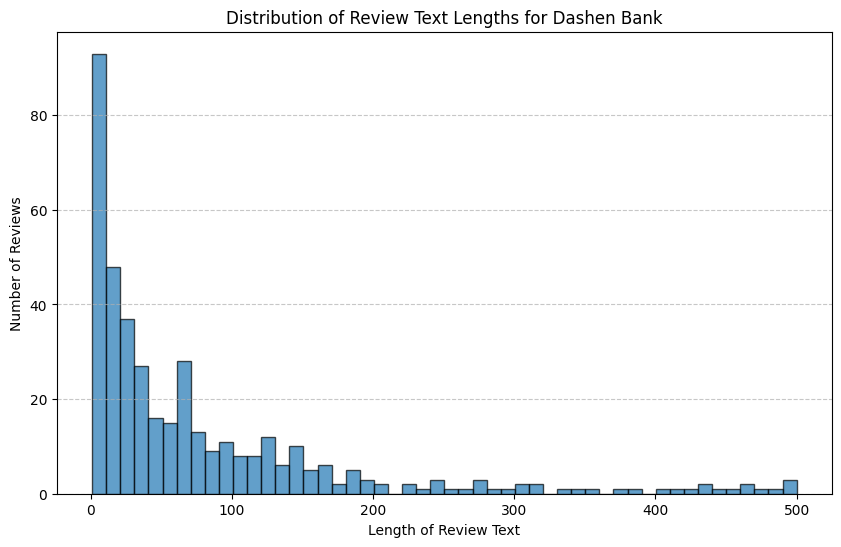

In [190]:
DA_Bank = df.iloc[400:800]
#save the Dashen bank reviews to csv file
DA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/Dashen_Bank_reviews.csv', index=False, encoding='utf-8-sig')
#visualization Dashen bank reviews
plt.figure(figsize=(10, 6))
plt.hist(DA_Bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Dashen Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
#boxplot for review text length
plt.figure(figsize=(10, 6))
plt.hist(DA_Bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Dashen Bank')
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

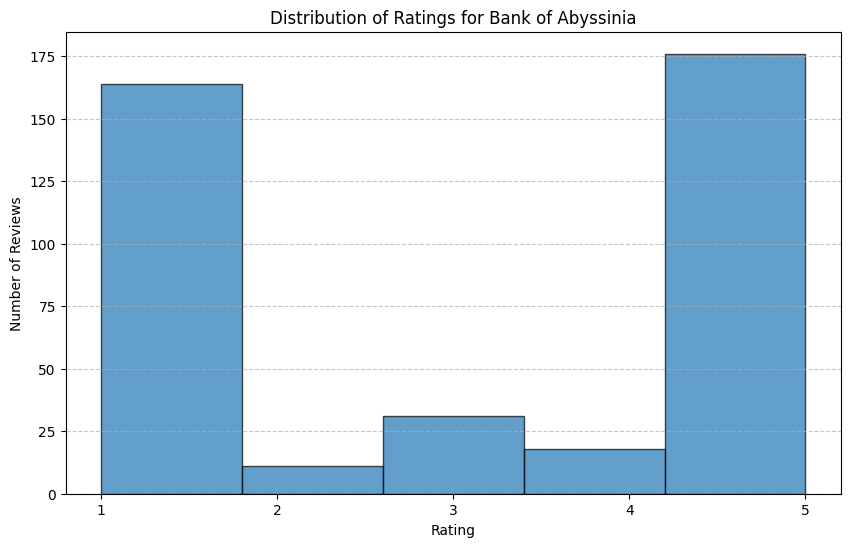

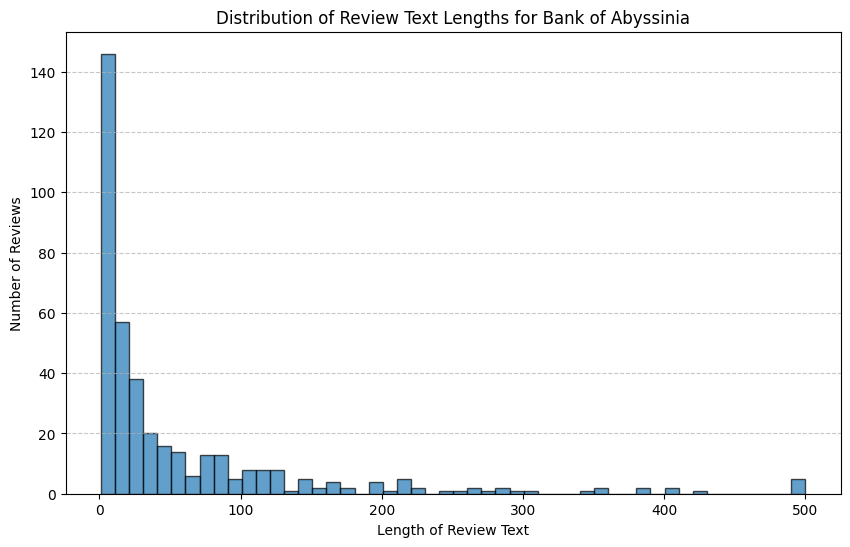

In [186]:
BOA_Bank = df.iloc[800:1200]
#save the BOA bank Absinia bank reviews to csv file
BOA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/BOA_Bank_reviews.csv', index=False, encoding='utf-8-sig')
#visualization BOA bank reviews
plt.figure(figsize=(10, 6))
plt.hist(BOA_Bank['rating'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings for Bank of Abyssinia')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Reveiw_text visualization
plt.figure(figsize=(10, 6))
plt.hist(BOA_Bank['review_text'].str.len(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Review Text Lengths for Bank of Abyssinia')
plt.xlabel('Length of Review Text')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Preprocessing the Data

**Steps**:
* Clean text: Remove punctuation, special characters, convert to lowercase.
* Tokenize: Split text into words.
* Remove stop words: Eliminate common words (e.g., "the," "and").
* Lemmatize: Reduce words to base form (e.g., "running" → "run").

In [187]:
def clean_review_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


**1. For CBE,DASHEN and BOA of Ethiopia**

In [193]:

#Apply the cleaning function to the review_text column
CBE_bank['cleaned_review_text'] = CBE_bank['review_text'].apply(clean_review_text)
# Save the cleaned reviews to a new CSV file
CBE_bank.to_csv('F:/Bank-Reviews-Analysis/Data/CBE_bank_reviews_cleaned_text.csv', index=False, encoding='utf-8-sig')
print("First 10 rows of cleaned CBE bank reviews:")
print(CBE_bank.head(10))


First 10 rows of cleaned CBE bank reviews:
                              review_id       userName  \
0  a7d1c799-ba53-4a0a-a8d6-c5400a009825  A Google user   
1  64ed5562-1758-4eb8-9291-8b6edc394118  A Google user   
2  d0c05687-ddd4-43fb-95a9-08f6358d80a2  A Google user   
3  811bf820-3529-433a-9b6d-e624fa23a16a  A Google user   
4  be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa  A Google user   
5  8efd71e9-59cd-41ce-8c5c-12052dee9ad0  A Google user   
6  b12d0383-9b27-4e49-a94d-277a43b15800  A Google user   
7  dd9f9e37-177a-46df-b877-d0edaa9aed29  A Google user   
8  8e34703c-203c-4180-8b32-bfd0b3f0c871  A Google user   
9  6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.c

C:\Users\user\AppData\Local\Temp\ipykernel_85380\21112122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBE_bank['cleaned_review_text'] = CBE_bank['review_text'].apply(clean_review_text)


In [194]:

#Apply for Dashen Bank reviews
DA_Bank['cleaned_review_text'] = DA_Bank['review_text'].apply(clean_review_text)
# Save the cleaned reviews to a new CSV file
DA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/Dashen_Bank_reviews_cleaned_text.csv', index=False, encoding='utf-8-sig')
print("First 10 rows of cleaned Dashen bank reviews:")
print(DA_Bank.head(10))


First 10 rows of cleaned Dashen bank reviews:
                                review_id              userName  \
400  6ab16d21-d2c8-4235-9c48-ff713bfde731              Adonijah   
401  22818807-3368-446c-8a3b-d3ca2e07a2d8               OBSA KA   
402  6ece1f5e-55f2-404d-b980-1cb45823180f              Masersha   
403  765ff69f-5274-45c5-985b-81b8d01e1874         Koki Mulugeta   
404  7db66b6a-a044-43f1-a7ad-ea8a10815548    Badhasa Dassaalany   
405  caf4a80c-85db-4b49-ab9c-a0b55e152317  Nebiyu Getachew Mamo   
406  2c5df026-16eb-4d6b-a044-acf4103d1c36            Mudin said   
407  c25b35d2-35dd-4347-a520-99471d7b1066           Tamiru Mamo   
408  5ced40d8-1074-421d-b6e6-be9e12e8b6bd      Hanes Yasin abdi   
409  5e6ff839-abc2-4b30-a8b4-e0f331da29d1     abduljelil alemar   

                                             userImage  \
400  https://play-lh.googleusercontent.com/a-/ALV-U...   
401  https://play-lh.googleusercontent.com/a-/ALV-U...   
402  https://play-lh.googleusercontent.com

C:\Users\user\AppData\Local\Temp\ipykernel_85380\1193140450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DA_Bank['cleaned_review_text'] = DA_Bank['review_text'].apply(clean_review_text)


In [196]:

#Apply for BOA Bank reviews
BOA_Bank['cleaned_review_text'] = BOA_Bank['review_text'].apply(clean_review_text)
# Save the cleaned reviews to a new CSV file
BOA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/BOA_Bank_reviews_cleaned_text.csv', index=False, encoding='utf-8-sig')
#display the first 10 rows of the cleaned reviews
print("First 10 rows of cleaned BOA bank reviews:")
print(BOA_Bank.head(10))


First 10 rows of cleaned BOA bank reviews:
                                review_id            userName  \
800  937102c6-ae88-419c-994b-80e520faacb8     Phillmon Haftom   
801  3559b91c-fad9-4032-bebe-cf99974b9628     Robel Alebachew   
802  10e85f30-540d-4810-ba89-85a7e004480b   Haymanot Anberber   
803  d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f   Mohamed Abdillahi   
804  2ca9480b-ff5f-4b59-952c-5921db83dab2          Ahadu tech   
805  8cd852da-0257-4ca0-9003-314fb464e55a     Fentaw Kefyalew   
806  d9172c66-a605-4626-acc6-e1dbca0685cd  Mansour Abdulkadir   
807  c3f2810d-cf99-4600-90ac-bef47adb9e7a            Ethiopia   
808  512f8c2b-8fac-41cc-978a-b58e39a1ea5c   Gizachew Tesfahun   
809  76089146-b1c7-47f4-ab9f-44b6a1092225     Tewodros Regasa   

                                             userImage  \
800  https://play-lh.googleusercontent.com/a/ACg8oc...   
801  https://play-lh.googleusercontent.com/a/ACg8oc...   
802  https://play-lh.googleusercontent.com/a/ACg8oc...   
803  http

C:\Users\user\AppData\Local\Temp\ipykernel_85380\2264011531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOA_Bank['cleaned_review_text'] = BOA_Bank['review_text'].apply(clean_review_text)


# Sentiment Analysis with TextBlob
**Description: TextBlob provides a straightforward way to classify sentiments based on polarity scores.**

In [ ]:

# Sentiment Analysis with TextBlob
#function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'
    # Polarity ranges from -1 (negative) to 1 (positive)
# Apply the sentiment analysis function to the cleaned review text
CBE_bank['textblob_sentiment'] = CBE_bank['cleaned_review_text'].apply(analyze_sentiment_textblob)
# Save the CBE bank reviews with sentiment analysis to a new CSV file
CBE_bank.to_csv('F:/Bank-Reviews-Analysis/Data/CBE_bank_reviews_sentiment_textblob.csv', index=False, encoding='utf-8-sig')
#Display sentiment distribution 
print("Sentiment analysis using TextBlob completed for CBE bank reviews.")
print(CBE_bank['textblob_sentiment'].value_counts())
# Apply the sentiment analysis function to the cleaned review text for Dashen Bank
DA_Bank['textblob_sentiment'] = DA_Bank['cleaned_review_text'].apply(analyze_sentiment_textblob)
# Save the Dashen bank reviews with sentiment analysis to a new CSV file
DA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/Dashen_Bank_reviews_sentiment_textblob.csv', index=False, encoding='utf-8-sig')
#Display sentiment distribution
print("Sentiment analysis using TextBlob completed for Dashen bank reviews.")
print(DA_Bank['textblob_sentiment'].value_counts())
# Apply the sentiment analysis function to the cleaned review text for BOA Bank
BOA_Bank['textblob_sentiment'] = BOA_Bank['cleaned_review_text'].apply(analyze_sentiment_textblob)
# Save the BOA bank reviews with sentiment analysis to a new CSV file
BOA_Bank.to_csv('F:/Bank-Reviews-Analysis/Data/BOA_Bank_reviews_sentiment_textblob.csv', index=False, encoding='utf-8-sig')
#Display sentiment distribution
print("Sentiment analysis using TextBlob completed for BOA bank reviews.")
print(BOA_Bank['textblob_sentiment'].value_counts())


C:\Users\user\AppData\Local\Temp\ipykernel_85380\2078584481.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CBE_bank['textblob_sentiment'] = CBE_bank['cleaned_review_text'].apply(analyze_sentiment_textblob)


Sentiment analysis using TextBlob completed for CBE bank reviews.
textblob_sentiment
positive    264
neutral     115
negative     21
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_85380\2078584481.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DA_Bank['textblob_sentiment'] = DA_Bank['cleaned_review_text'].apply(analyze_sentiment_textblob)


Sentiment analysis using TextBlob completed for Dashen bank reviews.
textblob_sentiment
positive    304
neutral      72
negative     24
Name: count, dtype: int64
Sentiment analysis using TextBlob completed for BOA bank reviews.
textblob_sentiment
positive    193
neutral     138
negative     69
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_85380\2078584481.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOA_Bank['textblob_sentiment'] = BOA_Bank['cleaned_review_text'].apply(analyze_sentiment_textblob)


# Visualization Result 

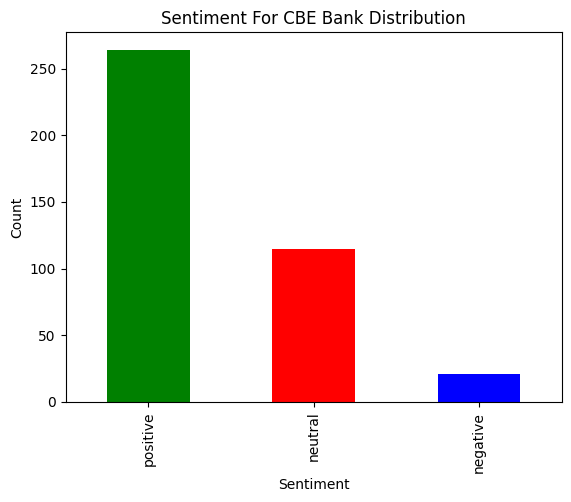

In [ ]:

# Sentiment distribution
CBE_bank['textblob_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment For CBE Bank Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


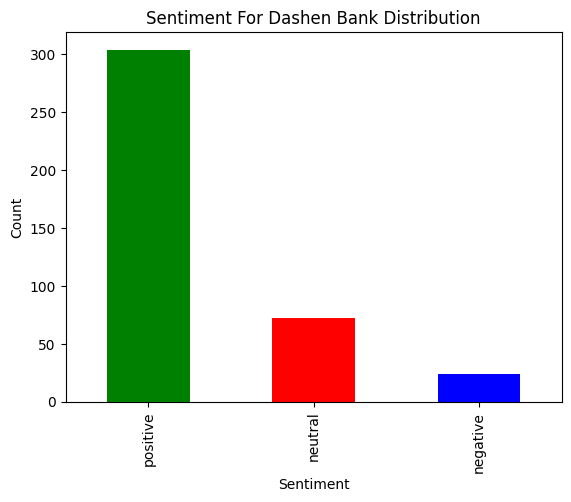

In [204]:
# Sentiment distribution
DA_Bank['textblob_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment For Dashen Bank Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

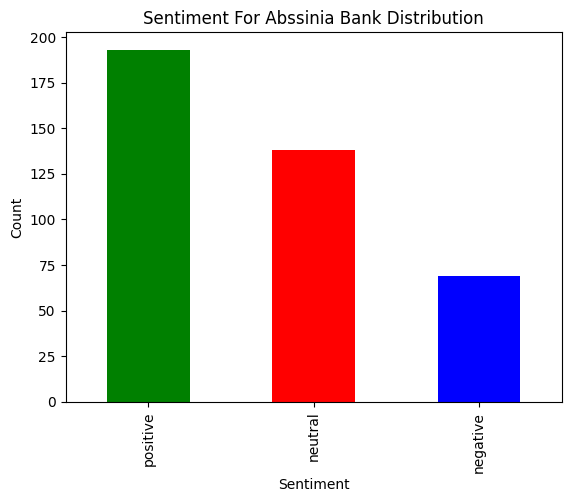

In [205]:
# Sentiment distribution
BOA_Bank['textblob_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment For Abssinia Bank Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()